# Upper Confidence Bound (UCB)
It is a reinforcement learning algorithm for solving the multi-armed bandit problem. UCB balances exploration (trying different options) and exploitation (choosing the best-known option) by selecting the action (or ad) with the highest upper confidence bound, which combines the average reward of that action with a term that accounts for uncertainty.

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [ ]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv") 

## Dataset dimensions: (N users × d ads)

In [ ]:
N, d = dataset.shape
print(f"Dataset contains {N} rounds (users) and {d} ads.")

Dataset contains 10000 rounds (users) and 10 ads.


## Initialize variables 

In [ ]:
ads_selected = []         # track which ad was selected each round
numbers_of_selections = [0] * d   # N_i(n): number of times each ad was selected
sums_of_rewards = [0] * d         # R_i(n): total reward of each ad
total_reward = 0

## Apply UCB

In [ ]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            # Average reward for ad i
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            # Delta_i(n): confidence bound
            delta_i = np.sqrt(3/2 * np.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            # Ensure each ad is selected at least once
            upper_bound = 1e400   # assign a huge value
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    # Select the best ad for this round
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward



## Visualization
### Plot histogram of ad selections

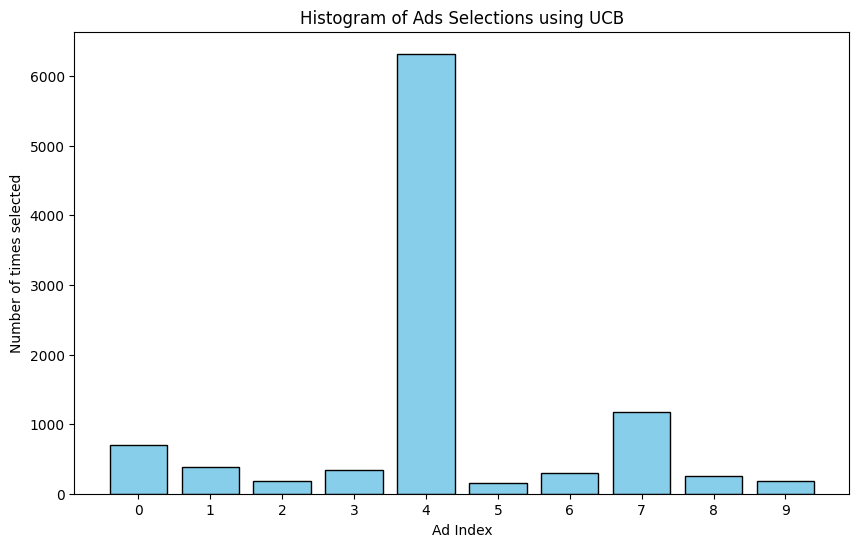

In [8]:

plt.figure(figsize=(10, 6))
plt.hist(ads_selected, bins=np.arange(d+1)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(d))
plt.xlabel("Ad Index")
plt.ylabel("Number of times selected")
plt.title("Histogram of Ads Selections using UCB")
plt.show()


## Total rewards and number of selections

In [9]:
print(f"Total Reward Achieved: {total_reward}")
print("Selections per Ad:", numbers_of_selections)

Total Reward Achieved: 2178
Selections per Ad: [705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]
